<a href="https://colab.research.google.com/github/ssj828/apk-level-sample/blob/master/LinearRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 해결을 위해 당뇨병 환자의 데이터 준비하기

(442, 10) (442,)


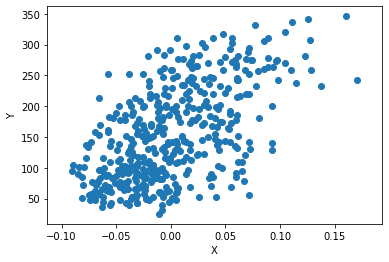

In [0]:
# 1. 사이킷런에서 당뇨병 환자 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

## data: 입력데이터, target: 타겟데이터, shape: 크기
print(diabetes.data.shape, diabetes.target.shape)

#diabetes.data[0:3] # 입력데이터
diabetes.target[:3] # 타겟데이터

# 2. 당뇨병 환자 데이터 시각화하기
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 훈련 데이터 준비하기
x = diabetes.data[:,2]
y = diabetes.target

훈련 데이터에 맞는 w와 b 찾아보기

In [0]:
## 사이킷런에서 당뇨병 환자 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

## 훈련 데이터 준비하기
x = diabetes.data[:,2]
y = diabetes.target

# 1. w와 b 초기화하기(랜덤값)
w = 1.0
b = 1.0

# 2. 훈련 데이터의 첫 번째 샘플 데이터로 y_hat 얻기
y_hat = x[0] * w + b
print("y_hat: ")
print(y_hat)

# 3. 타킷과 예측 데이터 비교하기
print("\ny[0]: ")
print(y[0])

# 4. w 값 조절해 예측값 바꾸기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b

print("\ny_hat_inc: ")
print(y_hat_inc)

# 5. w 값 조정한 후 예측값 증가 정도 확인하기
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print("\nw_rate: ")
print(w_rate)

##### 변화율로 가중치 w와 절편 b 업데이트하기 #####

# 6. 변화율로 가중치 w 업데이트
w_new = w + w_rate
print("\nw_new: ")
print(w_new) 

# 7. 변화율로 가중치 b 업데이트
b_new = b + 1
print("\nb_new: ")
print(b_new)


y_hat: 
1.0616962065186886

y[0]: 
151.0

y_hat_inc: 
1.0678658271705574

w_rate: 
0.061696206518688734

w_new: 
1.0616962065186888

b_new: 
2.0


y_hat: 
1.0616962065186886

y_hat_inc: 
1.0678658271705574

w_rate: 
0.061696206518688734

w_new, b_new
10.250624555904514 150.9383037934813
14.132317616381767 75.52764127612664
587.8654539985689 99.40935564531424


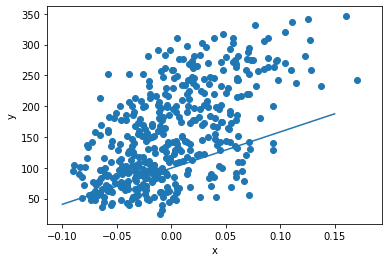

913.5973364345905 123.39414383177204


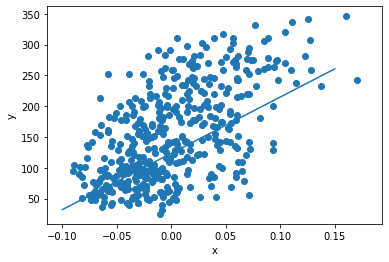

287.8416643899983


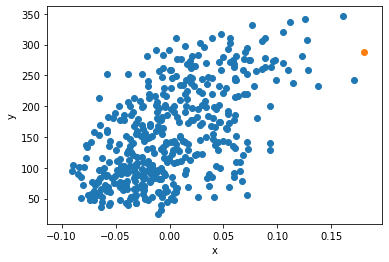

In [0]:
## 사이킷런에서 당뇨병 환자 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

## 훈련 데이터 준비하기
x = diabetes.data[:,2]
y = diabetes.target

# 1. w와 b 초기화하기(랜덤값)
w = 1.0
b = 1.0

# 2. 훈련 데이터의 첫 번째 샘플 데이터로 y_hat 얻기
y_hat = x[0] * w + b
print("y_hat: ")
print(y_hat)

# 4. w 값 조절해 예측값 바꾸기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b

print("\ny_hat_inc: ")
print(y_hat_inc)

# 5. w 값 조정한 후 예측값 증가 정도 확인하기
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print("\nw_rate: ")
print(w_rate)

##### 오차역전파로 가중치 w와 절편 b를 더 적절하게 업데이트하기 #####

# 6. 오차와 변화율을 곱하여 가중치 업데이트하기
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print("\nw_new, b_new")
print(w_new, b_new)

# 7. 오차를 구하고 새로운 w와 b를 구한다
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

# 8. 전체 샘플 반복하기
for x_i, y_i in zip(x,y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w,b)

# 9. 그래프로 그려보기
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 10. 여러 에포크로 반복하기
for i in range(1,100):
  ## 전체 샘플 반복하기
  for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w,b)

# 11. 그래프로 그려보기
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 12. 모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b 
print(y_pred)

plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#선형회귀를 위한 뉴런 만들기

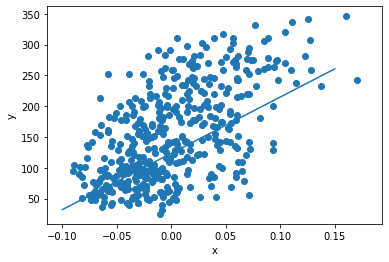

In [38]:
class Neuron:
  def __init__(self):
    self.w = 1.0                  # 가중치 초기화
    self.b = 1.0                  # 절편 초기화

  def forpass(self, x):
    y_hat = x * self.w + self.b   # 직선 방정식 계산
    return y_hat
  
  def backprop(self, x, err):
    w_grad = x * err              # 가중치에 대한 그레이디언트 계산
    b_grad = 1 * err              # 절편에 대한 그레이디언트 계산
    return w_grad, b_grad
  
  def fit(self, x, y, epochs=100):
    for i in range(epochs):       # 에포크만큼 반복
      for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복
        y_hat = self.forpass(x_i) # 정방향 계산
        err = -(y_i - y_hat)      # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
        self.w -= w_grad          # 가중치 업데이트
        self.b -= b_grad          # 절편 업데이트


## 사이킷런에서 당뇨병 환자 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

## 훈련 데이터 준비하기
x = diabetes.data[:,2]
y = diabetes.target

neuron = Neuron()
neuron.fit(x,y)

## 그래프로 그려보기
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()